# SVI Calibration 

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize']=(10,8)
import warnings 
warnings.filterwarnings('ignore')

In [2]:
from SVI import *

### Prepare Data :

In [3]:
# Data : Prices of Calls written on AAPL Stock, at t_0  = 2021-10-07.
C = pd.read_csv('C.csv', index_col=[0,1])
C_new = C.reset_index()
date_values = C.index.levels[0]
d = {}
for date in date_values:
    d[date] = C_new[C_new['level_0']==date][['C', 'K', 'sig']]
    
del d['2021-10-08']

tt = list(d.keys())
dt = [datetime.strptime(x, '%Y-%m-%d').date() for x in tt]
t_0  =datetime.today().date()
TT = [(t-t_0).days / 365 for t in dt]

In [4]:
r = 0.028
S_0 = 143

Test = prepareData(d, TT, r, S_0)

### Calibration :

#### $\color{darkred}{\mbox{Slice per Slice : }}$ 

In [7]:
epsilon_g = 0.05
params = fitSliceperSlice(Test, TT, epsilon_g)

In [11]:
for key in params.keys():
    params[key] = pd.Series(params[key])


In [14]:
P = pd.concat(params, axis=1)

In [47]:
# *** Get fitted values of x --> w(x) and x --> g(x)***
fitted, butterfly = getFitted(params, Test)

(0.5, 2.0)

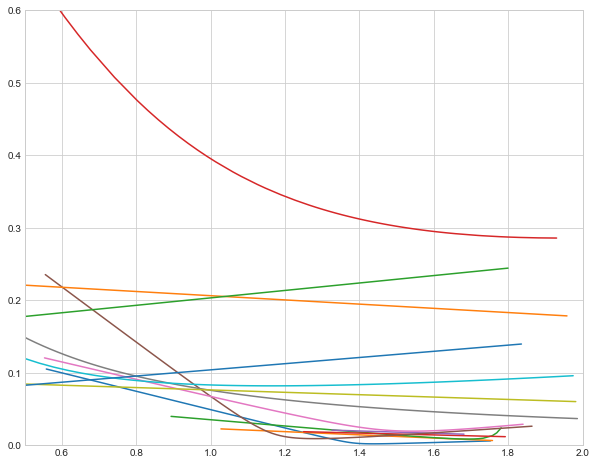

In [49]:
# Calendar Spread is present :

check_calendar_plot(fitted)
plt.ylim([0,0.6])
plt.xlim([0.5, 2])

(0.0, 1.0)

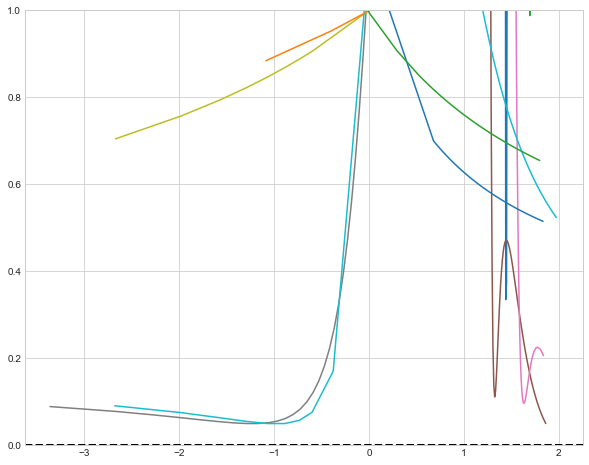

In [42]:
check_butterfly_plot(butterfly)
plt.axhline(0, color='k', linestyle='dashed', linewidth=2)
# Zoom to zero : 
plt.ylim([0,1])

In [6]:
temps = list(Test.keys())

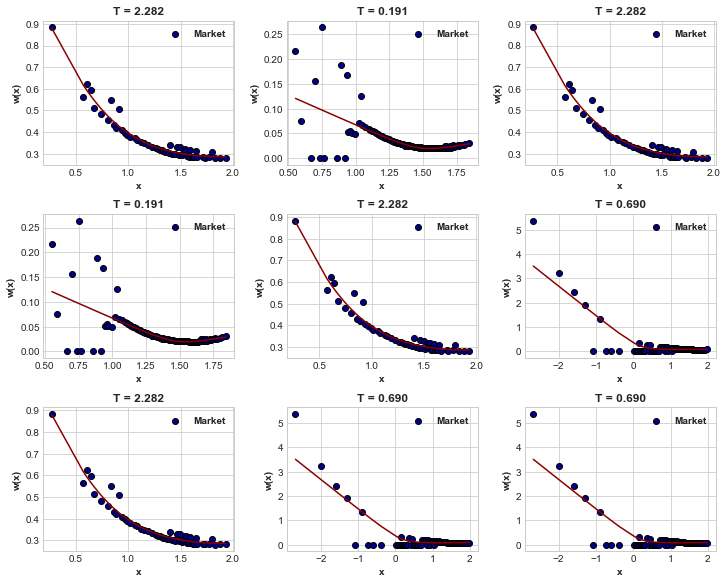

In [32]:
# Check goodness of fit :

fig, axs = plt.subplots(3,3, constrained_layout=True)
idx = [-1, 6, 13, -5, 9, 7]
for i in range(3):
    for j in range(3):
        axs[i,j].plot(fitted[TT[idx[i+j]]]['x'], fitted[TT[idx[i+j]]]['w'],color='darkred')
        axs[i,j].scatter(Test[temps[idx[i+j]]]['x'], Test[temps[idx[i+j]]]['w'], facecolors='darkblue', edgecolors='k', label='Market')
        axs[i,j].set_title('T = ' + str(TT[idx[i+j]])[0:5], fontdict={'weight':'bold'})
        axs[i,j].legend(prop={'weight':'bold'})
        axs[i,j].set_xlabel('x', fontdict={'weight':'bold'})
        axs[i,j].set_ylabel('w(x)', fontdict={'weight':'bold'}) 

#### $\color{darkred}{\mbox{Multi-Slices : }}$ 

In [17]:
# penalB = (x_min, x_max) st x_min = min of xs over all dataset, the same applies to x_max
penalB = (-3.3591601424833413, 1.9879473882341276)
epsilon_g = 0.05
params_multi = fitMultiSlice(Test, TT, epsilon_g, penalBounds = penalB)

In [18]:
for key in params_multi.keys():
    params_multi[key] = pd.Series(params_multi[key])
P = pd.concat(params_multi, axis=1)

In [8]:
fitted_m, butterfly_m = getFitted(params_multi, Test)

(0.0, 1.0)

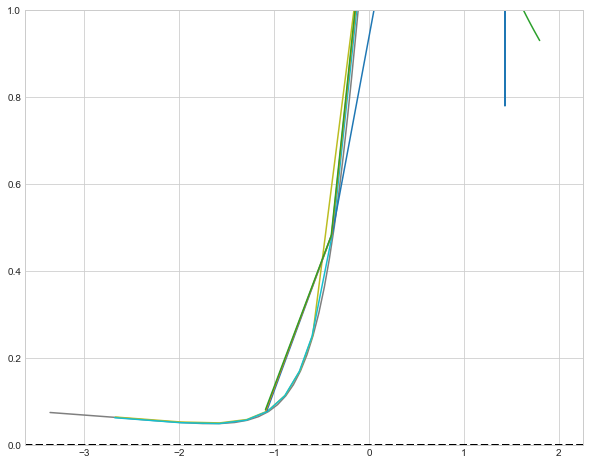

In [17]:
check_butterfly_plot(butterfly_m)
plt.axhline(0, color='k', linestyle='dashed', linewidth=2)

# Zoom :
plt.ylim([0,1])

In [24]:
import os
root = os.getcwd()
PROJECT_ROOT = os.path.join(root, 'DM_Figures')
os.makedirs(PROJECT_ROOT, exist_ok=True)
def save_fig(fig_id, tight_layout = True, fig_extention = 'pdf', resolution=300):
    path = os.path.join(PROJECT_ROOT, fig_id + '.' + fig_extention)
    print('Saving figure', fig_id, '\n\n')
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = fig_extention, dpi =resolution)

Saving figure calendar_ouss 




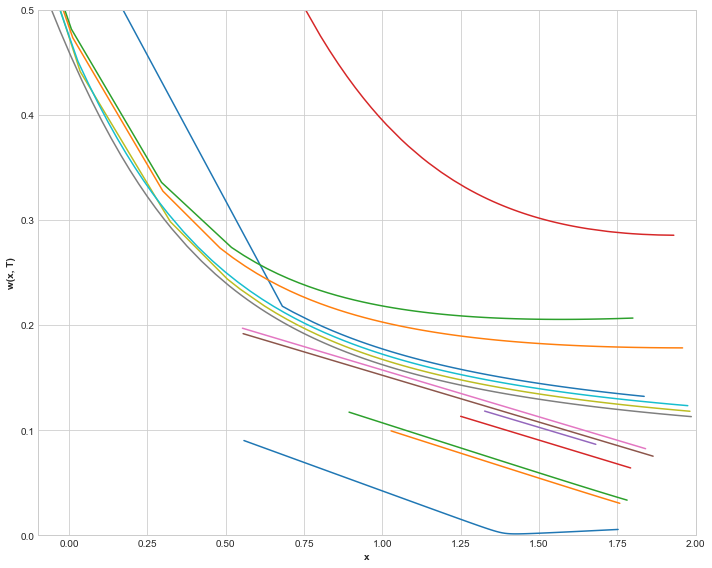

In [30]:
check_calendar_plot(fitted_m)
plt.ylabel('w(x, T)' , fontdict={'weight':'bold'})
plt.xlabel('x', fontdict={'weight':'bold'})
plt.ylim([0,0.5])
plt.xlim([-0.1, 2])


Saving figure ouss 




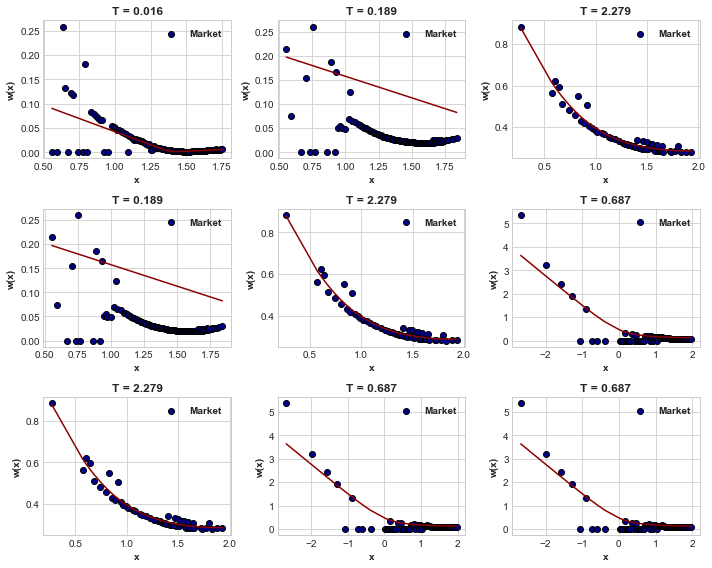

In [31]:
## Goodness of fit :

fig, axs = plt.subplots(3,3, constrained_layout=True)
idx = [0, 6, 13, -5, 9, 7]
for i in range(3):
    for j in range(3):
        axs[i,j].plot(fitted_m[TT[idx[i+j]]]['x'], fitted_m[TT[idx[i+j]]]['w'],color='darkred')
        axs[i,j].scatter(Test[temps[idx[i+j]]]['x'], Test[temps[idx[i+j]]]['w'], facecolors='darkblue', edgecolors='k', label='Market')
        axs[i,j].set_title('T = ' + str(TT[idx[i+j]])[0:5], fontdict={'weight':'bold'})
        axs[i,j].legend(prop={'weight':'bold'})
        axs[i,j].set_xlabel('x', fontdict={'weight':'bold'})
        axs[i,j].set_ylabel('w(x)', fontdict={'weight':'bold'})
  

Saving figure ouss_2 




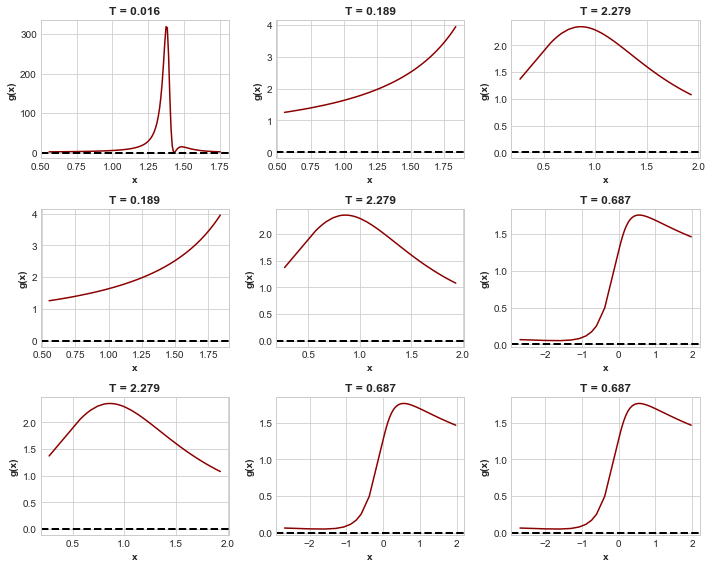

In [32]:
fig, axs = plt.subplots(3,3, constrained_layout=True)
idx = [0, 6, 13, -5, 9, 7]
for i in range(3):
    for j in range(3):
        axs[i,j].plot(butterfly_m[TT[idx[i+j]]]['x'], butterfly_m[TT[idx[i+j]]]['g'],color='darkred')
        #axs[i,j].scatter(Test[temps[idx[i+j]]]['x'], Test[temps[idx[i+j]]]['w'], facecolors='darkblue', edgecolors='k', label='Market')
        axs[i,j].axhline(0., color='k', linestyle='dashed', linewidth=2)
        axs[i,j].set_title('T = ' + str(TT[idx[i+j]])[0:5], fontdict={'weight':'bold'})
        #axs[i,j].legend(prop={'weight':'bold'})
        axs[i,j].set_xlabel('x', fontdict={'weight':'bold'})
        axs[i,j].set_ylabel('g(x)', fontdict={'weight':'bold'}) 
        
        

In [58]:
from scipy.interpolate import CubicSpline

In [73]:
N = 100
x_min, x_max = penalB
x_grid = np.linspace(x_min , x_max, N)
inter = {}
for key in fitted.keys():
    xs = fitted[key]['x']
    ys = fitted[key]['w']
    cs = CubicSpline(xs, ys)
    inter[key] = pd.Series(cs(x_grid), index=x_grid)

temp = pd.concat(inter, axis=1)

In [74]:
temp.shape

(100, 14)

In [64]:
tx = temp.columns
Ts = np.linspace(tx[0], tx[-1], N)
inter = {}
for j in range(temp.shape[0]):
    yx = temp.iloc[j,:]
    cs = CubicSpline(tx, yx)
    inter[temp.index[j]] = pd.Series(cs(Ts), index=Ts)
final = pd.concat(inter,axis=1).T 


In [68]:
def w_prime(theta, x):
    a, b, rho, m, sigma = theta
    w_prime = b *rho +  b *(x-m) / np.sqrt((x-m)**2 + sigma**2)
    return w_prime
def w_second(theta, x):
    a, b, rho, m, sigma = theta
    w_second = (b * sigma**2) / (((x-m)**2 + sigma **2) ** (3/2))
    return w_second

In [82]:
final = fitted.copy()
sig_dup = {}
for j in range(final.shape[1]-1):
    w_p = w_prime(params_multi[TT[j]], final.index)
    w_pp = w_second(params_multi[TT[j]], final.index)
    dw_dt = (final.iloc[:,j+1] - final.iloc[:,j]) / (TT[j+1] - TT[j])
    
    num = dw_dt + r * w_p
    alpha = final.index / final.iloc[:,j]
    A = (1 - 0.5 * alpha * w_p)**2
    B = 0.5 * w_pp
    C = -0.25 * (w_p **2) * (0.25 + 1 / final.iloc[:,j])
    denom = A + B + C
    
    sig_dup[TT[j]] = pd.Series(num / denom, index=final.index)
    

In [83]:
S = pd.concat(sig_dup, axis=1)